In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [3]:
result_loc = "./../../../../Server_results/09_14_2021/"
train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1623326650/"

run_name = "experiment13_09_12_35_40"


### Load files and reshape them

In [4]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])


N_steps = q_x.shape[2]

In [5]:
q_x.shape

(24, 64, 50)

In [6]:
p.shape

(24, 64)

In [7]:
# df_k_imp = pd.read_csv(f"{result_loc}check_initialq_x.txt",sep='\t',header=None)

In [111]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

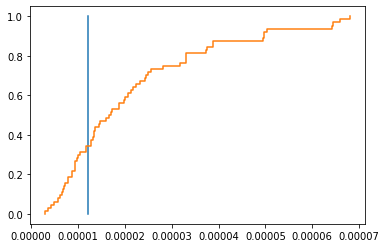

In [32]:

initial_lambda = 1 # 0 is initial guess, 1 is first optimization for mean value, 2 is first optimization cycle for initial lambda, n_max is (T_exp_final - T_exp)
final_lambda = 12
time_step = 2 # index for the coarse scale time step. Range is defined by 0 to N_steps

plot_cdf(p,q_x,time_step,initial_lambda)
plot_cdf(p,q_x,time_step,final_lambda)
# plot_cdf(p,q_x,2,7)
# # plot_cdf(p,q_x,2,11)
# plot_cdf(p,q_x,2,13)

# # plot_cdf(p,q_x,0,7)

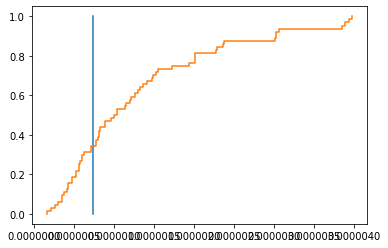

In [33]:
# initial_lambda = 1 # 0 is initial guess, 1 is first optimization for mean value, 2 is first optimization cycle for initial lambda, n_max is (T_exp_final - T_exp)
# final_lambda = 12
# time_step = 2 # index for the coarse scale time step. Range is defined by 0 to N_steps

plot_cdf(p,q_y,time_step,initial_lambda)
plot_cdf(p,q_y,time_step,final_lambda)

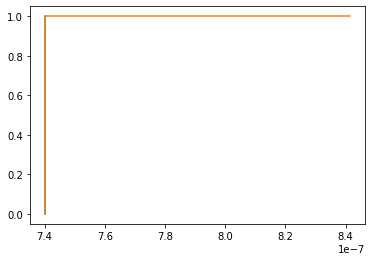

In [34]:
plot_cdf(p,q_y,2,1)
plot_cdf(p,q_y,2,3)
# plot_cdf(p,q_y,2,7)
# plot_cdf(p,q_y,2,11)

# plot_cdf(p,q_y,0,5)
# plot_cdf(p,q_y,0,6)
# plot_cdf(p,q_y,0,7)

In [35]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


In [36]:
q_MC_x.shape

(100, 1800)

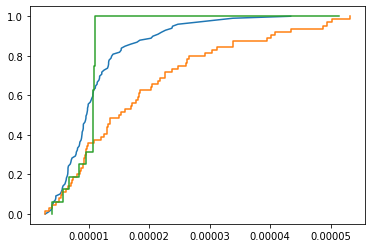

In [37]:
time_step = 35

ii = N_steps_orig//(N_steps-1) * (time_step) -1



Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

plot_cdf(p,q_x,time_step,20)

plot_cdf(p,q_x,time_step,8)

# plot_cdf(p,q_x,time_step,13)




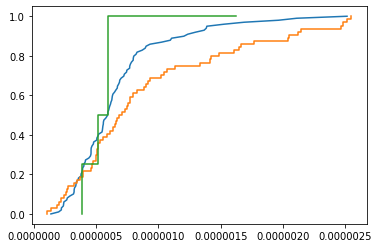

In [38]:
Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

plot_cdf(p,q_y,time_step,23)

plot_cdf(p,q_y,time_step,4)

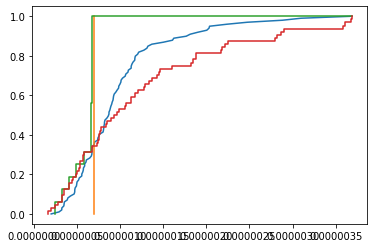

In [39]:
time_step = 3

ii = N_steps_orig//(N_steps-1) * (time_step) -1



Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

plot_cdf(p,q_y,time_step,1)

plot_cdf(p,q_y,time_step,8)

plot_cdf(p,q_y,time_step,13)




In [40]:
Q_MC = q_MC_x[:,ii]


In [41]:
time_step = 10

ii = N_steps_orig//N_steps * time_step 

ii

360

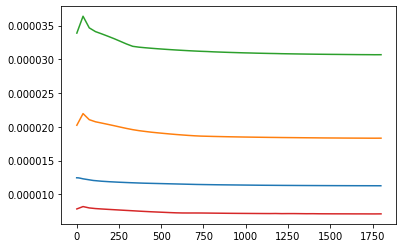

In [42]:

epoch = 6

plt.plot(q_MC_x.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

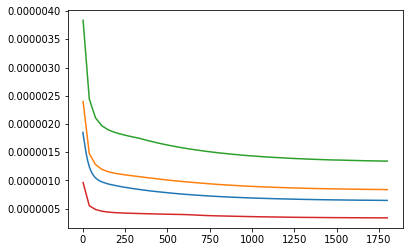

In [43]:
epoch = 6

plt.plot(q_MC_y.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

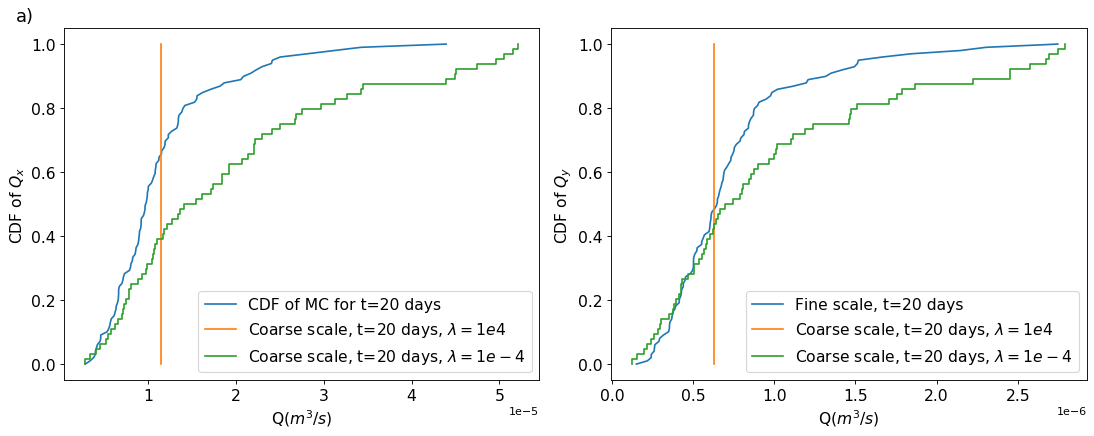

In [109]:
my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

time_step = 20
ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={time_step} days')
plot_cdf(p,q_x ,time_step,1,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e4$')
plot_cdf(p,q_x ,time_step,22,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e-4$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)


ax1 = plt.subplot(122)
Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={time_step} days')
plot_cdf(p,q_y ,time_step,1,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e4$')
plot_cdf(p,q_y ,time_step,22,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e-4$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

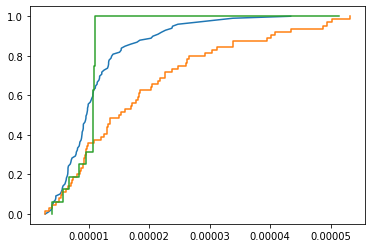

In [112]:
time_step = 35

ii = N_steps_orig//(N_steps-1) * (time_step) -1



Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

plot_cdf(p,q_x,time_step,20)

plot_cdf(p,q_x,time_step,8)

In [114]:
k_x.shape

(24, 64, 50)

In [279]:
epoch = 20


In [224]:
x1_2d = k_y[epoch,:,:]
w1 = p[epoch,:]
d1 = sm.DescrStatsW(x1_2d, weights=w1)
df_mean = d1.mean
df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [225]:
df_perc.shape

(50, 3)

In [262]:
b_perc =df_perc
t = np.linspace(0,1800,50)

In [276]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$25^{th} / 75^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


Text(-0.05, 1.02, 'c)')

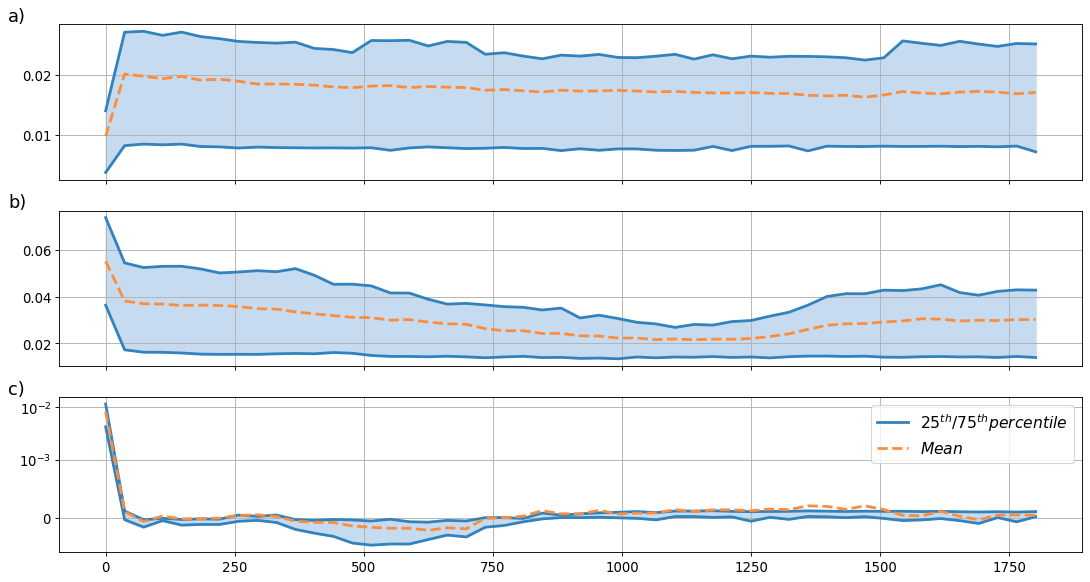

In [287]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)



ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=0.001)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)


